# ChatOllama

Ollama를 사용하면 Llama 2와 같은 오픈 소스 대규모 언어 모델을 로컬에서 실행할 수 있습니다.

Ollama는 모델 가중치, 구성 및 데이터를 Modelfile로 정의된 단일 패키지로 번들링합니다.

GPU 사용을 포함하여 설정 및 구성 세부 정보를 최적화합니다.

지원되는 모델 및 모델 변형의 전체 목록은 [Ollama model library](https://ollama.com/library)를 참조하세요.

## Setup

먼저, 다음 지침에 따라 로컬 Ollama 인스턴스를 설정하고 실행하세요:

- Ollama를 지원되는 플랫폼(Mac / Linux / Windows)에 다운로드하고 설치하세요.
- `ollama pull <name-of-model>` 명령을 사용하여 사용 가능한 LLM 모델을 가져오세요.
  - model library를 통해 사용 가능한 모델 목록을 확인하세요.
  - 예를 들어, `gemma-7b`의 경우: `ollama pull gemma:7b`
- 이렇게 하면 모델의 기본 태그 버전이 다운로드됩니다. 일반적으로 기본값은 최신의 가장 작은 크기 매개변수 모델을 가리킵니다.

> Mac에서는 모델이 `~/.ollama/models`에 다운로드됩니다.
>
> Linux(또는 WSL)에서는 모델이 `/usr/share/ollama/.ollama/models`에 저장됩니다.

- 관심 있는 모델의 정확한 버전을 `ollama pull gemma:7b`와 같이 지정하세요. (이 경우 `gemma` 모델의 다양한 태그를 확인하세요. 예. `gemma:2b`, `gemma:7b`)
- 가져온 모든 모델을 보려면 `ollama list`를 사용하세요.
- 명령줄에서 모델과 직접 채팅하려면 `ollama run <name-of-model>`을 사용하세요.
- 더 많은 명령은 Ollama documentation을 참조하세요. 터미널에서 `ollama help`를 실행하여 사용 가능한 명령도 확인할 수 있습니다.

## Usage

지원되는 매개변수의 전체 목록은 API reference page에서 확인할 수 있습니다.

LLaMA `chat` 모델(예: `ollama pull llama2:7b-chat`)을 사용하는 경우 `ChatOllama` 인터페이스를 사용할 수 있습니다.

여기에는 시스템 메시지 및 사용자 입력을 위한 special tokens이 포함됩니다.

## Interacting with Models

가져온 로컬 모델과 상호 작용하는 몇 가지 방법은 다음과 같습니다.

#### 터미널에 명령어 입력

- 모든 로컬 모델은 자동으로 `localhost:11434`에서 제공됩니다.
- 명령줄을 통해 직접 상호 작용하려면 `ollama run <name-of-model>`을 실행하세요.


- `ChatOllama` 클래스를 사용하여 Ollama 챗 모델을 초기화합니다.
- `ChatPromptTemplate` 클래스를 사용하여 주어진 템플릿으로부터 프롬프트를 생성합니다.
- LangChain Expressive Language(LCEL) 체인 문법을 사용하여 프롬프트, 언어 모델, 출력 파서를 파이프라인으로 연결합니다.
- `chain.invoke()` 메서드를 호출하여 주어진 주제에 대한 짧은 농담을 생성합니다.
- 생성된 응답은 터미널에 출력됩니다.


In [1]:
from langchain_community.chat_models import ChatOllama
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

# LangChain이 지원하는 다른 채팅 모델을 사용합니다. 여기서는 Ollama를 사용합니다.
llm = ChatOllama(model="gemma:7b")
# 주제를 기반으로 짧은 농담을 요청하는 프롬프트 템플릿을 생성합니다.
prompt = ChatPromptTemplate.from_template("{topic} 에 대하여 간략히 설명해 줘.")

# LangChain 표현식 언어 체인 구문을 사용합니다.
# LCEL에 대한 자세한 내용은 https://python.langchain.com/docs/expression_language/why 에서 확인할 수 있습니다.
chain = prompt | llm | StrOutputParser()

# 간결성을 위해 응답은 터미널에 출력됩니다.
# 프로덕션 환경에서 애플리케이션을 배포하기 위해 LangServe를 사용할 수 있습니다.
print(chain.invoke({"topic": "deep learning"}))

**Deep Learning**

Deep learning은 인공지식 분야의 하위 분야로서 많은 양의 데이터를 분석하여 패턴을 학습하는 강력한 모델입니다. 이 모델은 인간 시각, 청음, 언어와 같은 감각에 유사한 특성을 가집니다.

**주요 특징:**

* **계층적 아키텍처:** 여러 개의 계층으로 구성된 복잡한 모델입니다.
* **자동학습:** 데이터를 분석하여 모델을 학습하는 능력을 가집니다.
* **소화:** 많은 양의 데이터를 효과적으로 소화할 수 있습니다.
* **패턴 추출:** 데이터의 패턴을 추출하여 새로운 정보를 발굴할 수 있습니다.
* **변동성:** 새로운 데이터에 대한 학습을 잘할 수 있습니다.

**응용 분야:**

* 이미지 분류
* 자연어 처리
* 음성 인식
* 자원 추측
* 의료

**주요 이점:**

* **고성능:** 인간 수준의 성능을 훨씬 능가할 수 있습니다.
* **자동화:** 많은 작업을 자동화하여 시간을 절약할 수 있습니다.
* **새로운 가능성:** 새로운 문제 해결 및 전문성을 가능하게 줍니다.

**주요 단점:**

* **데이터 요구:** 많은 양의 데이터를 요구합니다.
* **복잡성:** 모델을 이해하고 조절하는 데 어려움이 있을 수 있습니다.
* **편향:** 학습 데이터의 편향을 반영할 수 있습니다.


LCEL 체인은 기본적으로 응답 스트리밍 및 비동기 지원과 같은 추가 기능을 제공합니다.


- `topic` 변수에 "Covid 19"이라는 주제를 딕셔너리 형태로 할당합니다.
- `chain.stream()` 메서드를 사용하여 `topic`을 입력으로 받아 텍스트를 생성합니다.
- 생성된 텍스트는 청크(chunk) 단위로 반환되며, `for` 루프를 통해 각 청크를 반복적으로 처리합니다.
- 각 청크는 `print()` 함수를 사용하여 출력됩니다.


In [9]:
topic = {"topic": "Covid 19"}  # 주제를 "Covid 19"로 설정합니다.

# chain 객체의 stream 메서드를 사용하여 주제에 대한 텍스트를 생성하고, 생성된 텍스트를 chunks 변수에 할당하면서 반복합니다.
for chunks in chain.stream(topic):
    print(chunks, end="", flush=True)  # 생성된 텍스트 조각(chunks)을 출력합니다.

**Covid-19는 바이러스 감염증**입니다.  SARS-CoV-2라는 바이러스가 원인이 되며, 폐렴, 호흡 문제, 그리고 기타 증세를 일으키는 질환입니다.

**증세:**
- 호흡 불명
- 숨가락의 불쾌침
- 사고력 감퇴
- 강력한 동무
- 아지루
- 비강 건조
- 숨소리

**위험 요인:**
- 65세이 이상
- 질환이나 약물을 사용하는 사람
- 약력이 약한 사람
- 흡연자
- 비만인
- 동물과의 접촉

**진료:**
- 약물
- 증세 완화제
- 호흡 지원 장치
- 입원

**예방:**
- 예방 접제
- 거리 확보
- 손씻기
- 마스킹
- 면역력 향상제

비동기 스트리밍 지원을 위한 예시입니다. 위에서 생성한 단일 chain을 통해 모든 것이 가능합니다.


- `topic` 변수에 "Space travel"이라는 주제를 딕셔너리 형태로 할당합니다.
- `chain.astream()` 메서드를 사용하여 `topic`을 입력으로 받아 비동기적으로 처리합니다.
- `astream()` 메서드는 AsyncIterator를 반환하므로, async for 루프를 사용하여 처리 결과를 청크 단위로 반복적으로 받아옵니다.
- 각 청크는 `chunks` 변수에 할당되며, `print()` 함수를 사용하여 출력합니다.


In [10]:
topic = {"topic": "LangChain"}  # 주제를 "Space travel"로 설정합니다.

async for chunks in chain.astream(
    topic
):  # 비동기적으로 체인을 실행하여 청크 단위로 결과를 반환합니다.
    print(chunks, end="", flush=True)  # 각 청크를 출력합니다.

LangChain은 자연어 처리(NLP)와 인공지식(AI)를 결합하여 언어 모델을 사용하여 다양한 작업을 수행할 수 있는 Python 라이브러리를 의미합니다.

**주요 특징:**

* **언어 모델:** Transformer 기반 모델, BERT, GPT-3 등 다양한 언어 모델을 사용하여 텍스트 분석, 문법 분석, 자연어 추론 등 다양한 작업에 사용할 수 있습니다.
* **연결성:** Python, Java, R 등 다양한 언어에서 사용할 수 있습니다.
* **이용성:** 간단한 API를 사용하여 모델을 쉽게 사용할 수 있습니다.
* **확장성:** 모델의 확장성을 향상시켜 더 많은 작업에 사용할 수 있습니다.

**주요 기능:**

* 텍스트 분석
* 문법 분석
* 자연어 추론
* 코드 분석
* 이미지 분석

**사용 사례:**

* 기사 요약
* 문법 검증
* 코드 분석
* 제품 리뷰 분석
* 정보 추출

LangChain은 NLP 및 AI를 사용하여 다양한 작업을 수행할 수 있는 강력한 도구입니다. 간편한 사용성과 확장성으로 많은 개발자들이 사용할 수 있습니다.

LangChain Expressive Language (LCEL) 인터페이스를 살펴보면, 체인을 생성할 때 사용할 수 있는 다른 인터페이스를 확인할 수 있습니다.

## 소스에서 빌드하기

소스에서 빌드하는 방법에 대한 최신 지침은 Ollama 문서의 [Building from Source](https://github.com/jmorganca/ollama?tab=readme-ov-file#building) 섹션을 참조하세요.


## Extraction

Ollama의 최신 버전을 사용하고 [`format`](https://github.com/jmorganca/ollama/blob/main/docs/api.md#json-mode) 플래그를 제공하세요.

`format` 플래그는 모델이 JSON 형식으로 응답을 생성하도록 강제합니다.

> **참고:** 편의를 위해 실험적인 [OllamaFunctions](https://python.langchain.com/docs/integrations/chat/ollama_functions) 래퍼를 시도해 볼 수도 있습니다.


- `ChatOllama` 클래스를 사용하여 `llm` 객체를 생성합니다.
- `model` 매개변수를 "llama2"로 설정하여 Llama2 모델을 사용합니다.
- `format` 매개변수를 "json"으로 설정하여 입출력 형식을 JSON으로 지정합니다.
- `temperature` 매개변수를 0으로 설정하여 모델의 출력을 결정론적으로 만듭니다.


In [11]:
from langchain_community.chat_models import ChatOllama

llm = ChatOllama(
    model="gemma:7b",  # 사용할 언어 모델을 지정합니다.
    format="json",  # 입출력 형식을 JSON으로 설정합니다.
    temperature=0,  # 샘플링 온도를 0으로 설정하여 결정론적인 출력을 생성합니다.
)

- `HumanMessage` 클래스를 사용하여 사용자의 질문을 담은 메시지 객체를 생성합니다.
- 생성된 `HumanMessage` 객체를 `messages` 리스트에 저장합니다.
- `llm.invoke()` 메서드를 호출하여 `messages` 리스트를 언어 모델에 전달하고 응답을 생성합니다.
- 언어 모델의 응답을 `chat_model_response` 변수에 저장합니다.
- `print()` 함수를 사용하여 `chat_model_response`를 출력합니다.


In [12]:
from langchain_core.messages import HumanMessage

messages = [
    HumanMessage(
        # 질문 메시지의 내용을 한글로 번역하였습니다.
        content="Tell me 10 places to travel in Europe. resonse in JSON format."
    )
]

chat_model_response = llm.invoke(messages)  # 언어 모델을 호출하여 응답을 생성합니다.
print(chat_model_response.content)  # 생성된 응답을 출력합니다.

{
  "places": [
    "Paris, France",
    "Rome, Italy",
    "Barcelona, Spain",
    "London, UK",
    "Amsterdam, Netherlands",
    "Venice, Italy",
    "Lisbon, Portugal",
    "Bruges, Belgium",
    "Dublin, Ireland",
    "Cologne, Germany"
  ]
}


- JSON 스키마를 정의하여 사람에 대한 식별 정보를 나타냅니다.
  - 스키마에는 `name`, `age`, `fav_food` 속성이 포함되어 있으며, `name`과 `age`는 필수 항목입니다.
- `ChatOllama` 언어 모델을 초기화합니다.
- 사용자 메시지를 정의하는 `messages` 리스트를 생성합니다.
  - 첫 번째 메시지는 JSON 스키마를 사용하여 사람에 대해 설명해달라는 요청입니다.
  - 두 번째 메시지는 JSON 스키마를 문자열로 포함합니다.
  - 세 번째 메시지는 주어진 스키마를 고려하여 John이라는 이름의 35세 피자를 좋아하는 사람에 대해 설명해달라는 요청입니다.
- `ChatPromptTemplate`을 사용하여 `messages`로부터 프롬프트를 생성합니다.
- `json.dumps()`를 사용하여 JSON 스키마를 문자열로 변환합니다.
- 프롬프트, 언어 모델, `StrOutputParser`를 파이프라인으로 연결하여 `chain`을 생성합니다.
- `chain.invoke()`를 호출하여 JSON 스키마를 포함한 입력을 전달하고 결과를 출력합니다.


In [31]:
import json

from langchain_community.chat_models import ChatOllama
from langchain_core.messages import HumanMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

json_schema = {
    "title": "Person",
    "description": "Identifying information about a person.",
    "type": "object",
    "properties": {
        "name": {"title": "Name", "description": "The person's name", "type": "string"},
        "age": {"title": "Age", "description": "The person's age", "type": "integer"},
        "occupation": {
            "title": "Occupation",
            "description": "The person's Occupation",
            "type": "string",
        },
    },
    "required": ["name", "age"],
}

llm = ChatOllama(model="gemma:7b")  # ChatOllama 언어 모델 초기화

messages = [
    HumanMessage(
        # JSON 스키마를 사용하여 사람에 대해 설명해달라는 요청 메시지
        content="Please tell me about a person using the following JSON schema:"
    ),
    HumanMessage(content="{dumps}"),  # JSON 스키마를 메시지로 전달
    HumanMessage(
        # 스키마를 고려하여 John이라는 35세의 피자를 좋아하는 사람에 대해 설명해달라는 요청 메시지
        content="""Now, considering the schema, please describe following person:
        Her name is Eun-Chae Lee, she is 25 years old, and she is a software engineer.
        """
    ),
]

prompt = ChatPromptTemplate.from_messages(
    messages
)  # 메시지들로부터 ChatPromptTemplate 생성

dumps = json.dumps(json_schema, indent=2)  # JSON 스키마를 문자열로 변환

chain = (
    prompt | llm | StrOutputParser()
)  # 프롬프트, 언어 모델, 출력 파서를 연결하여 체인 생성

print(chain.invoke({"dumps": dumps}))  # 체인을 호출하여 결과 출력

Sure, here's the description:

Eun-Chae Lee, a 25-year-old software engineer, is using the JSON schema shown below:

```
{
  "name": "Eun-Chae Lee",
  "age": 25,
  "occupation": "Software Engineer"
}
```

As you can see, the JSON schema defines a person with the name "Eun-Chae Lee", age "25", and occupation "Software Engineer". Eun-Chae is using this JSON schema to represent herself in a structured data format. This JSON data can be easily shared and understood by other systems.


## Multi-modal

Ollama는 [bakllava](https://ollama.ai/library/bakllava)와 [llava](https://ollama.ai/library/llava)와 같은 멀티모달 LLM을 지원합니다.

`tags`를 사용하여 [Llava](https://ollama.ai/library/llava/tags)와 같은 모델의 전체 버전 세트를 탐색할 수 있습니다.

`ollama pull bakllava` 명령어를 통해 원하는 LLM을 다운로드하세요.

멀티모달을 지원하는 최신 버전을 사용하려면 Ollama를 업데이트해야 합니다.

아래에서 ChatOllama 멀티모달 지원을 사용하는 일반적인 예시를 확인하세요.


- Pillow 라이브러리를 최신 버전으로 업그레이드하는 pip 명령어입니다.
- `--upgrade` 옵션을 사용하여 이미 설치된 Pillow 라이브러리를 최신 버전으로 업그레이드합니다.
- `--quiet` 옵션을 사용하여 설치 과정에서 출력되는 메시지를 최소화합니다.


In [ ]:
%pip install --upgrade --quiet  pillow

PIL 이미지를 Base64 인코딩된 문자열로 변환하고 이를 HTML에 포함하여 이미지를 표시하는 함수를 제공합니다.

- `convert_to_base64` 함수:

  - PIL 이미지를 입력으로 받습니다.
  - 이미지를 JPEG 형식으로 BytesIO 버퍼에 저장합니다.
  - 버퍼의 값을 Base64로 인코딩하고 문자열로 반환합니다.

- `plt_img_base64` 함수:

  - Base64 인코딩된 문자열을 입력으로 받습니다.
  - Base64 문자열을 소스로 사용하는 HTML `<img>` 태그를 생성합니다.
  - HTML을 렌더링하여 이미지를 표시합니다.

- 사용 예시:
  - 지정된 파일 경로에서 PIL 이미지를 열어 `pil_image`에 저장합니다.
  - `convert_to_base64` 함수를 사용하여 `pil_image`를 Base64 인코딩된 문자열로 변환합니다.
  - `plt_img_base64` 함수를 사용하여 Base64 인코딩된 문자열을 이미지로 표시합니다.



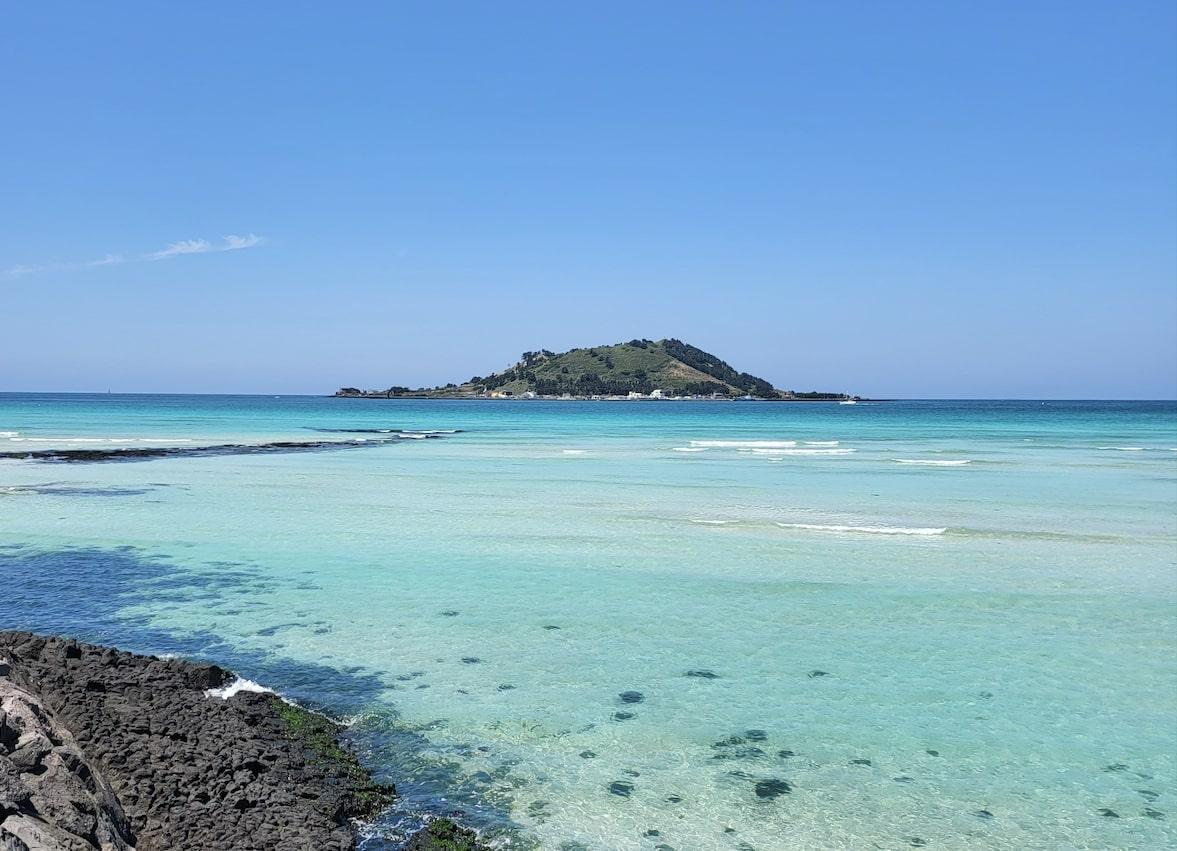

In [19]:
import base64
from io import BytesIO

from IPython.display import HTML, display
from PIL import Image


def convert_to_base64(pil_image):
    """
    PIL 이미지를 Base64로 인코딩된 문자열로 변환합니다.

    :param pil_image: PIL 이미지
    :return: 크기 조정된 Base64 문자열
    """

    buffered = BytesIO()
    pil_image.save(buffered, format="JPEG")  # 필요한 경우 형식을 변경할 수 있습니다.
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return img_str


def plt_img_base64(img_base64):
    """
    Base64로 인코딩된 문자열을 이미지로 표시합니다.

    :param img_base64:  Base64 문자열
    """
    # Base64 문자열을 소스로 사용하여 HTML img 태그 생성
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
    # HTML을 렌더링하여 이미지 표시
    display(HTML(image_html))


file_path = "./images/jeju-beach.jpg"
pil_image = Image.open(file_path)

image_b64 = convert_to_base64(pil_image)
plt_img_base64(image_b64)

- `ChatOllama` 언어 모델을 사용하여 이미지와 텍스트 기반 질의에 대한 답변을 생성하는 체인을 구현합니다.
- `prompt_func` 함수는 이미지와 텍스트 데이터를 입력으로 받아 `HumanMessage` 형식으로 변환합니다.
  - 이미지 데이터는 Base64 인코딩된 JPEG 형식으로 전달됩니다.
  - 텍스트 데이터는 일반 텍스트로 전달됩니다.
- `StrOutputParser`를 사용하여 언어 모델의 출력을 문자열로 파싱합니다.
- `prompt_func`, `llm`, `StrOutputParser`를 파이프라인으로 연결하여 `chain`을 생성합니다.
- `chain.invoke` 메서드를 호출하여 이미지와 텍스트 질의를 전달하고 답변을 생성합니다.
- 생성된 답변을 출력합니다.


In [20]:
from langchain_core.output_parsers import StrOutputParser
from langchain_community.chat_models import ChatOllama
from langchain_core.messages import HumanMessage

# ChatOllama 언어 모델을 초기화하고 온도를 0으로 설정합니다.
llm = ChatOllama(model="llava:7b", temperature=0)


def prompt_func(data):  # 프롬프트 함수를 정의합니다.
    text = data["text"]  # 데이터에서 텍스트를 가져옵니다.
    image = data["image"]  # 데이터에서 이미지를 가져옵니다.

    image_part = {  # 이미지 부분을 정의합니다.
        "type": "image_url",  # 이미지 URL 타입을 지정합니다.
        "image_url": f"data:image/jpeg;base64,{image}",  # 이미지 URL을 생성합니다.
    }

    content_parts = []  # 콘텐츠 부분을 저장할 리스트를 초기화합니다.

    text_part = {"type": "text", "text": text}  # 텍스트 부분을 정의합니다.

    content_parts.append(image_part)  # 이미지 부분을 콘텐츠 부분에 추가합니다.
    content_parts.append(text_part)  # 텍스트 부분을 콘텐츠 부분에 추가합니다.

    return [HumanMessage(content=content_parts)]  # HumanMessage 객체를 반환합니다.


# 프롬프트 함수, 언어 모델, 출력 파서를 연결하여 체인을 생성합니다.
chain = prompt_func | llm | StrOutputParser()

query_chain = chain.invoke(  # 체인을 호출하여 쿼리를 실행합니다.
    # 텍스트와 이미지를 전달합니다.
    {"text": "Describe a picture in bullet points.", "image": image_b64}
)

print(query_chain)  # 쿼리 결과를 출력합니다.

 - The image shows a picturesque tropical beach scene.
- In the foreground, there is a rocky shore with clear blue water and white foam from waves crashing onto the rocks.
- A small island or landmass is visible in the background, surrounded by the ocean.
- The sky is clear and blue, suggesting good weather conditions.
- There are no people visible in the image.
- The overall style of the image is a natural landscape photograph with vibrant colors and clear details. 
